In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
path = "/content/test.csv"
pd.read_csv(path)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
data = pd.read_csv('/content/test.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1.SUPPORT VECTOR MACHINNE


In [12]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.48      0.49        93
           1       0.56      0.56      0.56       107

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.53      0.52       200



2.Linear Regression Implementation


In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print('Linear Regression Metrics:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Linear Regression Metrics:
Mean Absolute Error: 0.5073255583885818
Mean Squared Error: 0.26753064121127124
Root Mean Squared Error: 0.517233642768209


 3.Decision Tree Implementation



Decision Tree Metrics:
Mean Absolute Error: 0.52
Mean Squared Error: 0.52
Root Mean Squared Error: 0.7211102550927979


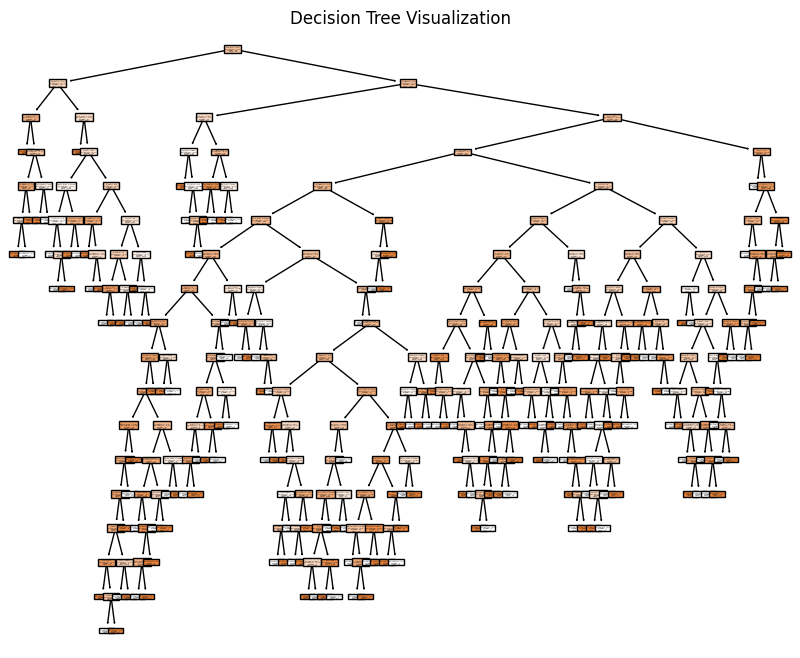

In [14]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print('\nDecision Tree Metrics:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))
plt.figure(figsize=(10, 8))
from sklearn import tree
tree.plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

4.Random Forest Implementation


In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('\nRandom Forest Metrics:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))


Random Forest Metrics:
Mean Absolute Error: 0.5155
Mean Squared Error: 0.278208
Root Mean Squared Error: 0.5274542634200619


5.KNN

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
url = "/content/test.csv"
df = pd.read_csv(url)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
print(f"Best n_neighbors: {grid_search.best_params_['n_neighbors']}")
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*175:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best n_neighbors: 17
Accuracy: 87.50
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        93
           1       0.53      0.51      0.52       107

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



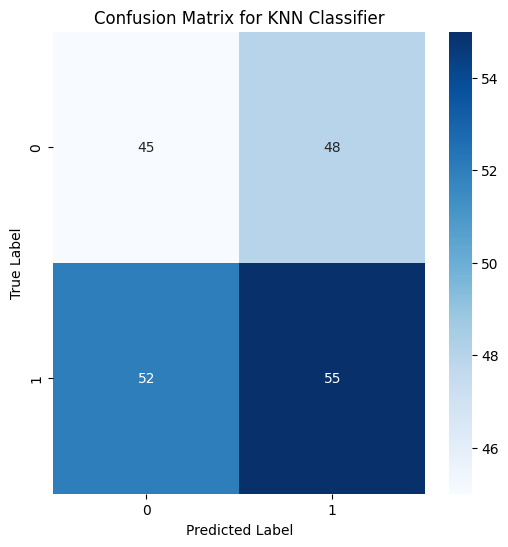

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

6.precision, recall and F1 score

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

url = "/content/test.csv"
df = pd.read_csv(url)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.46      0.44        93
           1       0.48      0.44      0.46       107

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200

